In [83]:
import pandas as pd

# Chargement des données
df = pd.read_csv('C:/Users/GRETA/Desktop/CSV/Clustering/card_credit_fraud.csv').head(1000)
labels_true = df['isFraud'].values
df = df.drop(columns=['transactionId', 'nameOrig', 'nameDest', 'isFraud'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prétraitement des données
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type']

# Séparer les variables numériques des variables catégorielles
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns 
categorical_features = df.select_dtypes(include=['object']).columns 

# Créer les transformateurs pour le ColumnTransformer
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())]) 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Application du prétraitement
X_preprocessed = preprocessor.fit_transform(df)
 

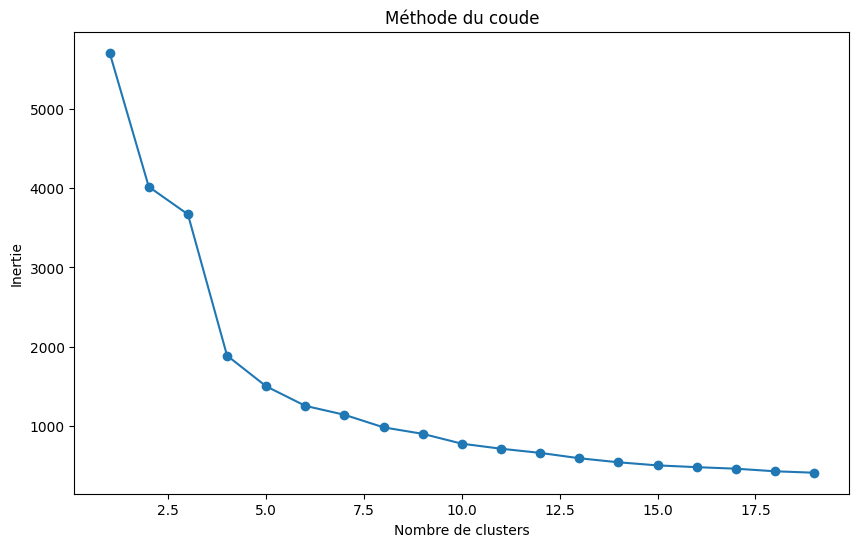

Le nombre de cluster optimal est : 5


In [85]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

inertia = []
K_range = range(1,20)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42).fit(X_preprocessed)
    inertia.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K_range, inertia, 'o-')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

kl = KneeLocator(
    K_range, inertia, curve="convex", direction="decreasing"
)
optimal_clusters = kl.elbow

print(f"Le nombre de cluster optimal est : {optimal_clusters}")

In [86]:
from sklearn.cluster import KMeans

# Application de K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_preprocessed)

# Obtention des étiquettes de cluster
labels = kmeans.labels_

In [87]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Nombre de clusters et de bruits
print("Nombre de clusters: %d" % len(set(labels)))
print("Nombre de points de bruit : %d" % list(labels).count(-1))

# Affichage des métriques
print(f"Homogénéité : {homogeneity_score(labels_true, labels)}")
print(f"Complétude : {completeness_score(labels_true, labels)}")
print(f"V-mesure : {v_measure_score(labels_true, labels)}")
print(f"Indice de Rand ajusté : {adjusted_rand_score(labels_true, labels)}")
print(f"Information mututelle ajusté : {adjusted_mutual_info_score(labels_true, labels)}")
print(f"Coefficient de silhouette : {silhouette_score(X_preprocessed, labels)}")

Nombre de clusters: 5
Nombre de points de bruit : 0
Homogénéité : 0.20537293940612933
Complétude : 0.009146012774266802
V-mesure : 0.0175121452739301
Indice de Rand ajusté : 0.005218338692372488
Information mututelle ajusté : 0.014432489335546247
Coefficient de silhouette : 0.5230939943441314


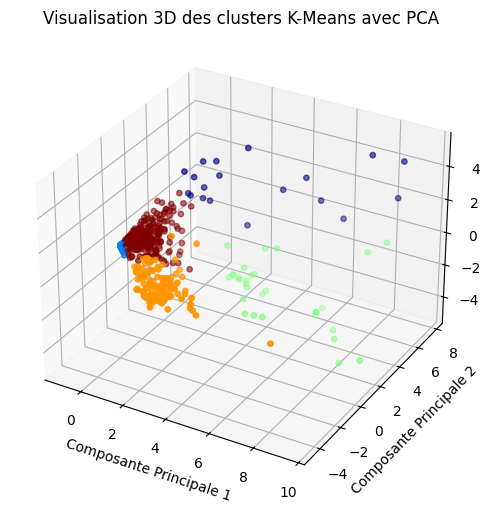

In [88]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimensionnalité à 3 composantes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

# Configurez le graphique 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assignez les couleurs des clusters
colors = plt.cm.jet(labels.astype(float) / max(labels.max(), 1))

# Tracez les points avec les couleurs des clusters
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=15, c=colors, depthshade=True)

# Titre et étiquettes
ax.set_title('Visualisation 3D des clusters K-Means avec PCA')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')

# Affichez le graphique
plt.show()
